#### To use the Random Forest Survival analysis you will need to use the Pysurvival package.
To install this package please follow the instructions from this site https://square.github.io/pysurvival/installation.html
##### For MacOS users:
You will need to add two more lines besides the recommended 2 as shown below:
###### Note: please check which version of gcc do you have as it might be different from 9.3.0.



### To use the Random Forest Survival analysis we need to load the data and remove the colinear features

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### using the panda reader import your file where the data is contained

In [2]:
clinical_data=pd.read_excel('clin_data_dim1_only.xlsx')

clinical_data

,filename,FFLP,FFLP_in_months,diagnostics_Image-original_Mean,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,18284004043,0,0.8,0.085291,206.351060,191.512165,228.461403,1.516300e+06,125.444723,0.602862,...,4.980000e-13,4.980000e-13,-3.200000e-16,7.060000e-07,0,0,1000000,0,0.000000,0.000000e+00
1,20243743626,0,1.1,0.066494,137.568410,149.512939,168.919628,8.994795e+05,109.224397,0.749403,...,5.000000e-01,5.000000e-01,1.000000e+00,5.300000e-06,35601274489,0,1000000,0,0.000000,0.000000e+00
2,20444767425,1,36.3,0.084962,191.981316,218.335061,226.247648,1.488096e+06,114.298757,0.739233,...,2.570000e-12,2.570000e-12,-3.200000e-16,1.600000e-06,0,0,1000000,0,0.000000,0.000000e+00
3,20525126502,1,2.0,0.062180,266.796480,295.046283,300.551338,3.100770e+06,150.802062,0.616919,...,1.610000e-12,1.610000e-12,-3.200000e-16,1.270000e-06,0,0,1000000,0,0.000000,0.000000e+00
4,20542019984,1,2.5,0.054680,478343.000000,1.000000,0.274078,1.744043e-02,0.442152,0.654056,...,1.000000e+00,0.000000e+00,1.000000e+00,2.288120e+11,228812000000,228812000000,1,1,1.000000,4.370000e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,211310175445,1,3.8,0.063273,938032.000000,1.000000,0.219055,1.123862e-01,0.255243,0.625670,...,1.000000e+00,0.000000e+00,1.000000e+00,8.799040e+11,879904000000,879904000000,1,1,1.000000,1.140000e-12
80,211401772640,1,9.5,0.044872,565274.000000,1.000000,0.267947,1.417342e-01,1.000000,0.766636,...,1.000000e+00,0.000000e+00,1.000000e+00,3.195350e+11,319535000000,319535000000,1,1,1.000000,3.130000e-12
81,211502540723,1,4.4,0.074059,629500.000000,1.000000,0.272925,3.144191e-02,0.790224,0.804265,...,1.000000e+00,0.000000e+00,1.000000e+00,3.962700e+11,396270000000,396270000000,1,1,1.000000,2.520000e-12
82,211545340988,1,13.1,0.081775,883970.000000,3.000000,0.281658,6.112728e-02,0.353797,0.668528,...,1.000000e+00,0.000000e+00,1.000000e+00,2.604050e+11,260405000000,260405000000,1,1,0.333333,2.396260e-04


In [37]:
# originally this step manually removes excluded rows, but this was done beforehand already
data=clinical_data.drop([]).reset_index(drop=True)

data.columns

Index(['filename', 'FFLP', 'FFLP_in_months', 'diagnostics_Image-original_Mean',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       ...
       'original_glszm_SmallAreaHighGrayLevelEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength'],
      dtype='object', length=106)

In [38]:
data['time column']=clinical_data['FFLP_in_months']
data['event column']=clinical_data['FFLP']
data

,filename,FFLP,FFLP_in_months,diagnostics_Image-original_Mean,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,time column,event column
0,18284004043,0,0.8,0.085291,206.351060,191.512165,228.461403,1.516300e+06,125.444723,0.602862,...,-3.200000e-16,7.060000e-07,0,0,1000000,0,0.000000,0.000000e+00,0.8,0
1,20243743626,0,1.1,0.066494,137.568410,149.512939,168.919628,8.994795e+05,109.224397,0.749403,...,1.000000e+00,5.300000e-06,35601274489,0,1000000,0,0.000000,0.000000e+00,1.1,0
2,20444767425,1,36.3,0.084962,191.981316,218.335061,226.247648,1.488096e+06,114.298757,0.739233,...,-3.200000e-16,1.600000e-06,0,0,1000000,0,0.000000,0.000000e+00,36.3,1
3,20525126502,1,2.0,0.062180,266.796480,295.046283,300.551338,3.100770e+06,150.802062,0.616919,...,-3.200000e-16,1.270000e-06,0,0,1000000,0,0.000000,0.000000e+00,2.0,1
4,20542019984,1,2.5,0.054680,478343.000000,1.000000,0.274078,1.744043e-02,0.442152,0.654056,...,1.000000e+00,2.288120e+11,228812000000,228812000000,1,1,1.000000,4.370000e-12,2.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,211310175445,1,3.8,0.063273,938032.000000,1.000000,0.219055,1.123862e-01,0.255243,0.625670,...,1.000000e+00,8.799040e+11,879904000000,879904000000,1,1,1.000000,1.140000e-12,3.8,1
80,211401772640,1,9.5,0.044872,565274.000000,1.000000,0.267947,1.417342e-01,1.000000,0.766636,...,1.000000e+00,3.195350e+11,319535000000,319535000000,1,1,1.000000,3.130000e-12,9.5,1
81,211502540723,1,4.4,0.074059,629500.000000,1.000000,0.272925,3.144191e-02,0.790224,0.804265,...,1.000000e+00,3.962700e+11,396270000000,396270000000,1,1,1.000000,2.520000e-12,4.4,1
82,211545340988,1,13.1,0.081775,883970.000000,3.000000,0.281658,6.112728e-02,0.353797,0.668528,...,1.000000e+00,2.604050e+11,260405000000,260405000000,1,1,0.333333,2.396260e-04,13.1,1


In [5]:
data1=data.drop(columns=['filename'])
data1.to_csv('for_survival.csv')

In [6]:
lola=data1.iloc[:,0:255]
lola.columns

Index(['FFLP', 'FFLP_in_months', 'diagnostics_Image-original_Mean',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea',
       ...
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'time column',
       'event column'],
      dtype='object', length=107)

In [7]:
time_column='time column'
event_column='event column'
features=np.setdiff1d(data1.columns, [time_column, event_column]).tolist()
len(features)

105

### We will be using Variance Inflation Factor to remove the colinear features
In the RFS analysis it is very important to remove the colinear features

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=20.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [17]:
lola

,FFLP,FFLP_in_months,diagnostics_Image-original_Mean,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,time column,event column
0,0,0.8,0.085291,206.351060,191.512165,228.461403,1.516300e+06,125.444723,0.602862,105874.065700,...,-3.200000e-16,7.060000e-07,0,0,1000000,0,0.000000,0.000000e+00,0.8,0
1,0,1.1,0.066494,137.568410,149.512939,168.919628,8.994795e+05,109.224397,0.749403,60130.657090,...,1.000000e+00,5.300000e-06,35601274489,0,1000000,0,0.000000,0.000000e+00,1.1,0
2,1,36.3,0.084962,191.981316,218.335061,226.247648,1.488096e+06,114.298757,0.739233,85268.758820,...,-3.200000e-16,1.600000e-06,0,0,1000000,0,0.000000,0.000000e+00,36.3,1
3,1,2.0,0.062180,266.796480,295.046283,300.551338,3.100770e+06,150.802062,0.616919,166687.329600,...,-3.200000e-16,1.270000e-06,0,0,1000000,0,0.000000,0.000000e+00,2.0,1
4,1,2.5,0.054680,478343.000000,1.000000,0.274078,1.744043e-02,0.442152,0.654056,0.465568,...,1.000000e+00,2.288120e+11,228812000000,228812000000,1,1,1.000000,4.370000e-12,2.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1,3.8,0.063273,938032.000000,1.000000,0.219055,1.123862e-01,0.255243,0.625670,0.432181,...,1.000000e+00,8.799040e+11,879904000000,879904000000,1,1,1.000000,1.140000e-12,3.8,1
80,1,9.5,0.044872,565274.000000,1.000000,0.267947,1.417342e-01,1.000000,0.766636,0.594034,...,1.000000e+00,3.195350e+11,319535000000,319535000000,1,1,1.000000,3.130000e-12,9.5,1
81,1,4.4,0.074059,629500.000000,1.000000,0.272925,3.144191e-02,0.790224,0.804265,0.595326,...,1.000000e+00,3.962700e+11,396270000000,396270000000,1,1,1.000000,2.520000e-12,4.4,1
82,1,13.1,0.081775,883970.000000,3.000000,0.281658,6.112728e-02,0.353797,0.668528,0.382030,...,1.000000e+00,2.604050e+11,260405000000,260405000000,1,1,0.333333,2.396260e-04,13.1,1


In [39]:
#VIF of 10 means that all the features with R^2 above 0.9 will removed
X=lola
data2 = calculate_vif_(X, 10)

dropping 'original_glszm_LargeAreaLowGrayLevelEmphasis' at index: 90
dropping 'original_glszm_LargeAreaHighGrayLevelEmphasis' at index: 89
dropping 'original_glcm_JointEntropy' at index: 48
dropping 'original_glcm_JointAverage' at index: 46
dropping 'original_glszm_ZonePercentage' at index: 94
dropping 'original_glcm_Idmn' at index: 41
dropping 'original_glcm_Idn' at index: 41
dropping 'original_glcm_JointEnergy' at index: 44
dropping 'original_glrlm_GrayLevelNonUniformityNormalized' at index: 64
dropping 'original_glszm_GrayLevelNonUniformity' at index: 78
dropping 'original_glrlm_ShortRunHighGrayLevelEmphasis' at index: 76
dropping 'original_glrlm_LongRunEmphasis' at index: 66
dropping 'original_glrlm_LongRunLowGrayLevelEmphasis' at index: 67
dropping 'original_gldm_LargeDependenceHighGrayLevelEmphasis' at index: 57
dropping 'original_gldm_LargeDependenceLowGrayLevelEmphasis' at index: 57
dropping 'original_glrlm_LowGrayLevelRunEmphasis' at index: 65
dropping 'FFLP_in_months' at inde

In [40]:
#This looked like it was manually extracting the non-colinear features
#Commented out, instead, I am using the retun value from the calculate_vif_ function
#creating a new dataframe with colinear features removed
#data2=data1.loc[:, ['LBP94', 'LBP101', 'LBP106', 'LBP107', 'LBP108', 'LBP112', 'LBP116',
#       'LBP118', 'LBP119', 'LBP120', 'FD27', 'FD51', 'FD54', 'ACM1_12', 'time column', 'event column']]
#data2

data2

,diagnostics_Image-original_Mean,original_shape_Sphericity,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Minimum,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_ClusterShade,...,original_gldm_HighGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_glrlm_RunLengthNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_SmallAreaEmphasis,original_glszm_ZoneVariance,time column,event column
0,0.085291,0.602862,169.977940,1.000000,2.612943e-02,2.080749,106098.412100,1.000000,0.000267,0.000000e+00,...,1,1.000000,885.083460,1,1.000000,2.006100e+12,4.980000e-13,0,0.8,0
1,0.066494,0.749403,291.671983,1.000000,3.242447e-02,13.231604,66437.829210,1.000000,0.000805,0.000000e+00,...,1,1.000000,309.960293,1,1.000000,7.120293e+10,5.000000e-01,35601274489,1.1,0
2,0.084962,0.739233,146.059205,0.901134,2.056420e-02,-0.347523,126579.259900,1.000000,0.000204,0.000000e+00,...,1,1.000000,465.328602,1,1.000000,3.897590e+11,2.570000e-12,0,36.3,1
3,0.062180,0.616919,406.532467,1.000000,2.780000e-17,17.662616,225569.881800,1.000000,0.000908,0.000000e+00,...,1,1.000000,697.778439,1,1.000000,6.229520e+11,1.610000e-12,0,2.0,1
4,0.054680,0.654056,129.845625,0.573641,2.682388e-01,0.005158,56.236260,0.442152,0.004666,1.744043e-02,...,1,1.205389,0.001697,1,828.845166,3.188927e-02,1.000000e+00,228812000000,2.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.063273,0.625670,139.443101,0.580209,2.130985e-01,0.004749,10.228300,0.255243,0.003651,1.123862e-01,...,1,0.982660,0.001552,1,523.323784,1.597888e-02,1.000000e+00,879904000000,3.8,1
80,0.044872,0.766636,136.623098,0.701331,2.620978e-01,0.004913,1336.638399,1.000000,0.004114,1.417342e-01,...,1,0.929279,0.001535,1,310.198389,1.682249e-02,1.000000e+00,319535000000,9.5,1
81,0.074059,0.804265,149.836373,0.653518,2.677475e-01,0.004422,223.621661,0.790224,0.004289,3.144191e-02,...,1,0.988335,0.001585,1,510.365221,1.993770e-02,1.000000e+00,396270000000,4.4,1
82,0.081775,0.668528,161.970384,0.571584,2.767928e-01,0.005292,82.712979,0.353797,0.003573,6.112728e-02,...,1,0.939497,0.001579,1,715.831247,2.436486e-02,3.000000e+00,260405000000,13.1,1


In [41]:
#create a dataframe with time and event columns
time_column='time column'
event_column='event column'
features=np.setdiff1d(data2.columns, [time_column, event_column]).tolist()
len(features)
features
data2

,diagnostics_Image-original_Mean,original_shape_Sphericity,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Minimum,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_ClusterShade,...,original_gldm_HighGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_glrlm_RunLengthNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_SmallAreaEmphasis,original_glszm_ZoneVariance,time column,event column
0,0.085291,0.602862,169.977940,1.000000,2.612943e-02,2.080749,106098.412100,1.000000,0.000267,0.000000e+00,...,1,1.000000,885.083460,1,1.000000,2.006100e+12,4.980000e-13,0,0.8,0
1,0.066494,0.749403,291.671983,1.000000,3.242447e-02,13.231604,66437.829210,1.000000,0.000805,0.000000e+00,...,1,1.000000,309.960293,1,1.000000,7.120293e+10,5.000000e-01,35601274489,1.1,0
2,0.084962,0.739233,146.059205,0.901134,2.056420e-02,-0.347523,126579.259900,1.000000,0.000204,0.000000e+00,...,1,1.000000,465.328602,1,1.000000,3.897590e+11,2.570000e-12,0,36.3,1
3,0.062180,0.616919,406.532467,1.000000,2.780000e-17,17.662616,225569.881800,1.000000,0.000908,0.000000e+00,...,1,1.000000,697.778439,1,1.000000,6.229520e+11,1.610000e-12,0,2.0,1
4,0.054680,0.654056,129.845625,0.573641,2.682388e-01,0.005158,56.236260,0.442152,0.004666,1.744043e-02,...,1,1.205389,0.001697,1,828.845166,3.188927e-02,1.000000e+00,228812000000,2.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.063273,0.625670,139.443101,0.580209,2.130985e-01,0.004749,10.228300,0.255243,0.003651,1.123862e-01,...,1,0.982660,0.001552,1,523.323784,1.597888e-02,1.000000e+00,879904000000,3.8,1
80,0.044872,0.766636,136.623098,0.701331,2.620978e-01,0.004913,1336.638399,1.000000,0.004114,1.417342e-01,...,1,0.929279,0.001535,1,310.198389,1.682249e-02,1.000000e+00,319535000000,9.5,1
81,0.074059,0.804265,149.836373,0.653518,2.677475e-01,0.004422,223.621661,0.790224,0.004289,3.144191e-02,...,1,0.988335,0.001585,1,510.365221,1.993770e-02,1.000000e+00,396270000000,4.4,1
82,0.081775,0.668528,161.970384,0.571584,2.767928e-01,0.005292,82.712979,0.353797,0.003573,6.112728e-02,...,1,0.939497,0.001579,1,715.831247,2.436486e-02,3.000000e+00,260405000000,13.1,1


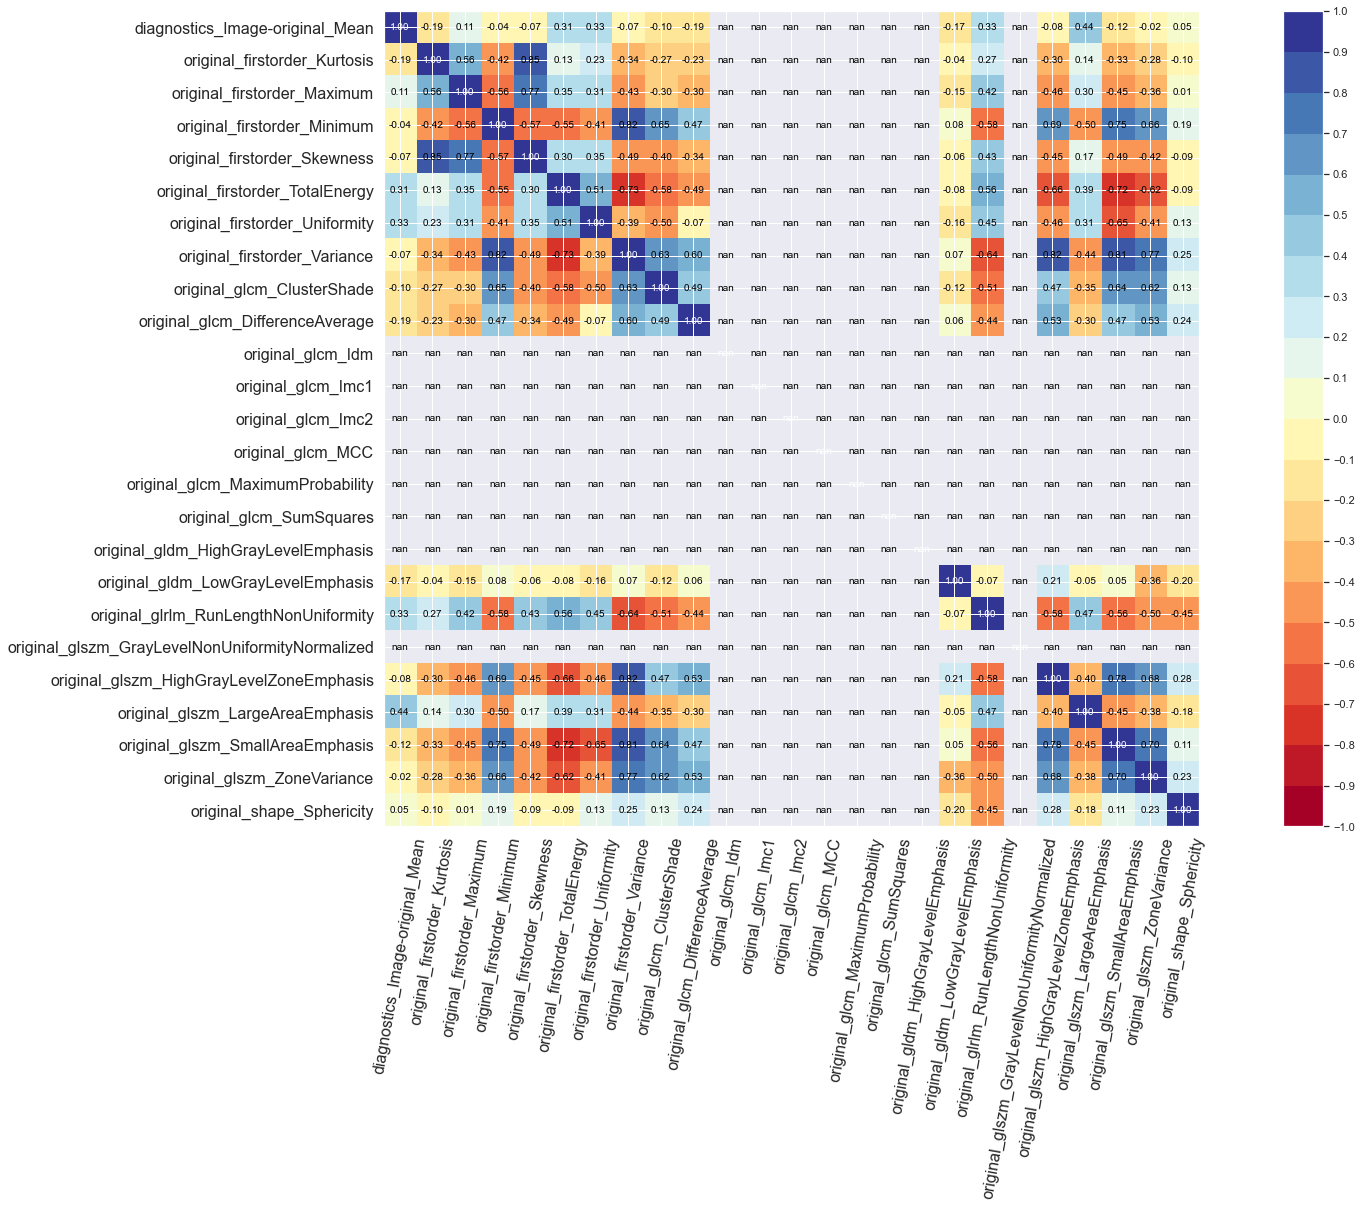

In [49]:
#visualize the correlation matrix
from pysurvival.utils.display import correlation_matrix
correlation_matrix(data2[features], figure_size=(30,15), text_fontsize=10)

**Some features are uniform across all patients leading to 0 correlation - could consider dropping them to clean up code and improve runtime**

#### Now we are ready to analyze our data 
 we need to define our input (X), time (T) and event (E) columns


In [44]:
# Creating the X, T and E inputs
X = data2[features]

newX=np.setdiff1d(data2.columns, [ event_column]).tolist()
X=data2[newX]
E=data2['event column']

### Now we are ready to perform the random forest survival analysis
#### In this example we are using the 10 Stratified Kfold and and evaluating the performance of each run by 
#### evaluating the concordance and plotting the predicted survival curve and error


 1 of kfold 10
C-index: 0.86


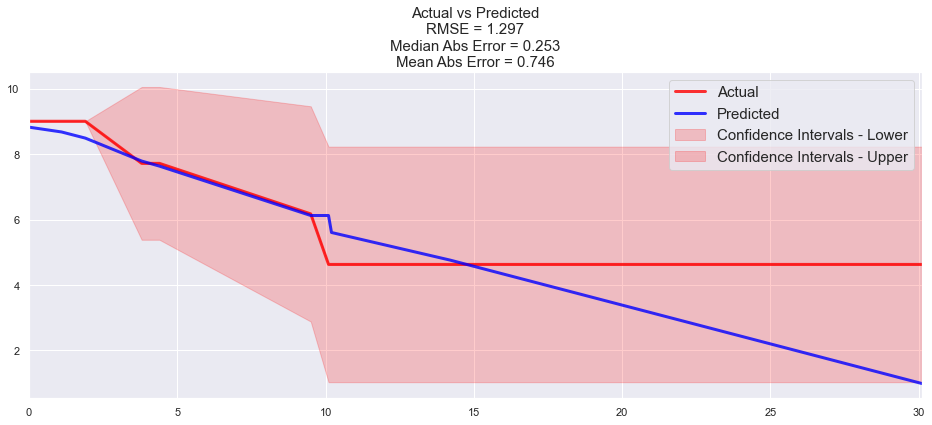

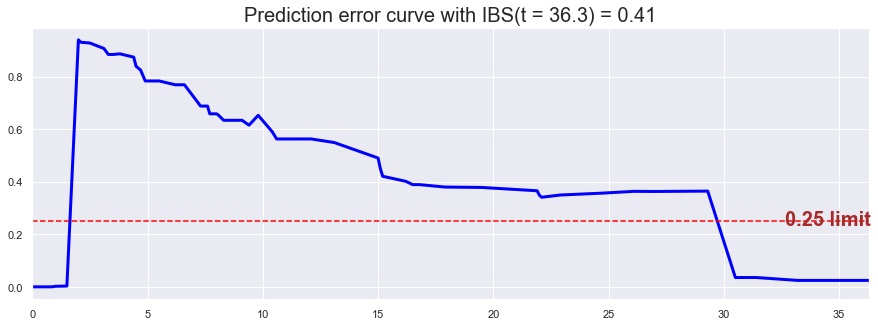

IBS: 0.41

 2 of kfold 10
C-index: 0.63


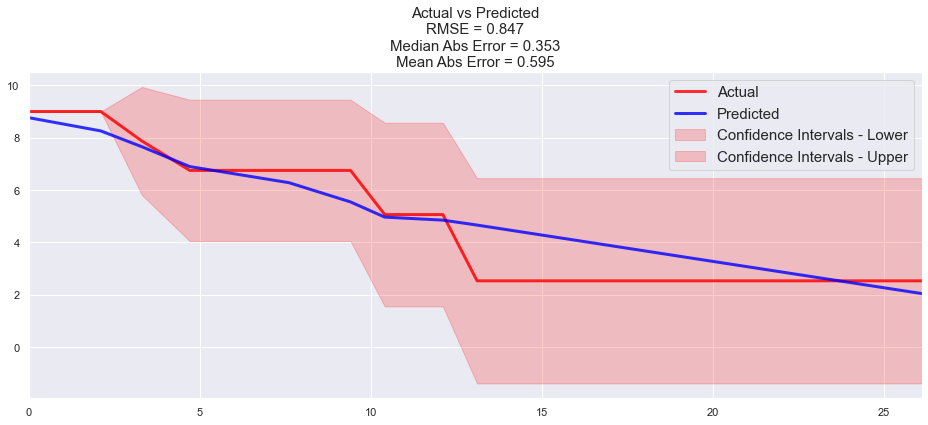

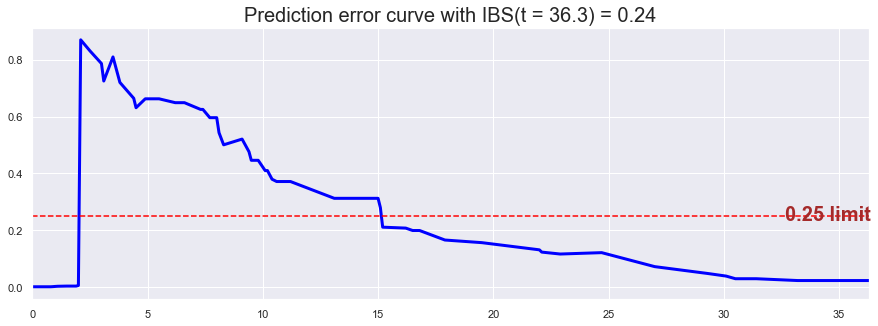

IBS: 0.24

 3 of kfold 10
C-index: 0.70


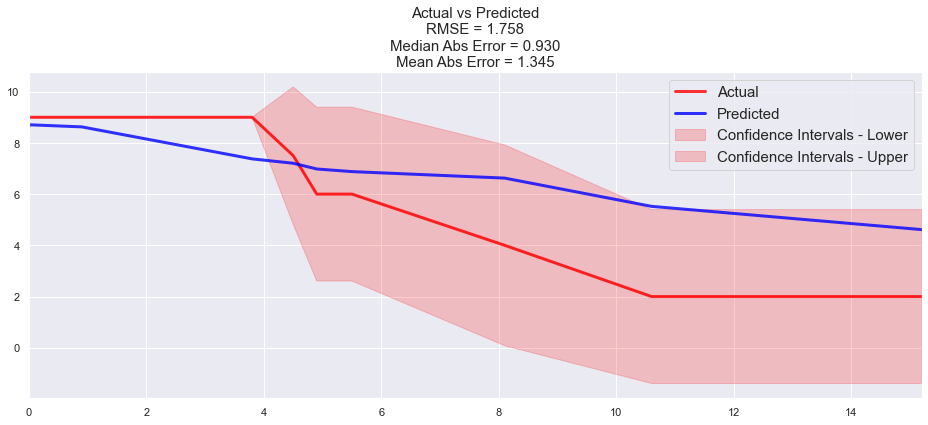

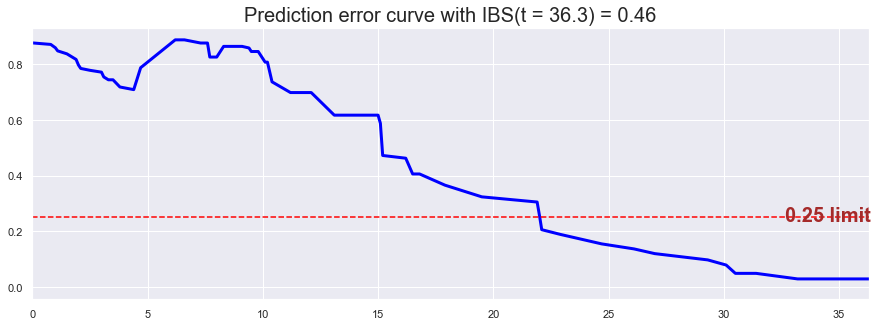

IBS: 0.46

 4 of kfold 10
C-index: 0.70


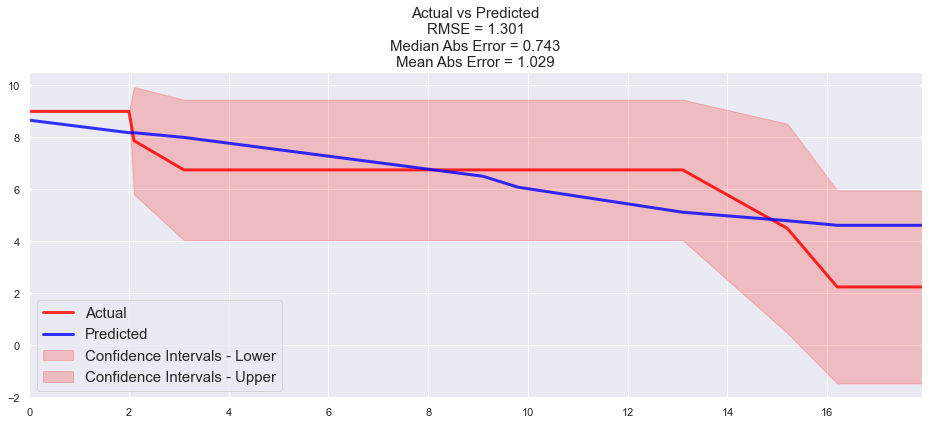

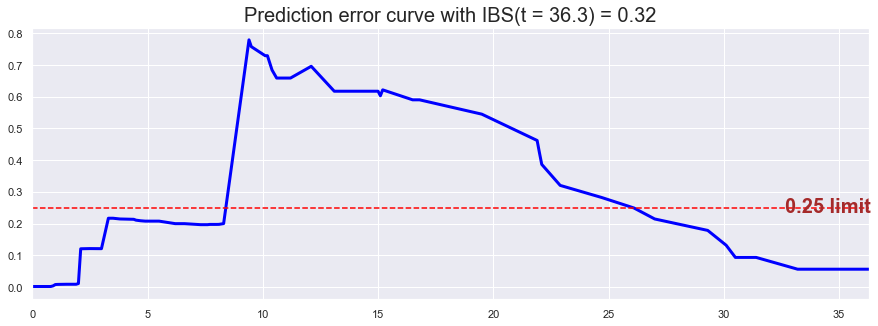

IBS: 0.32

 5 of kfold 10
C-index: 0.54


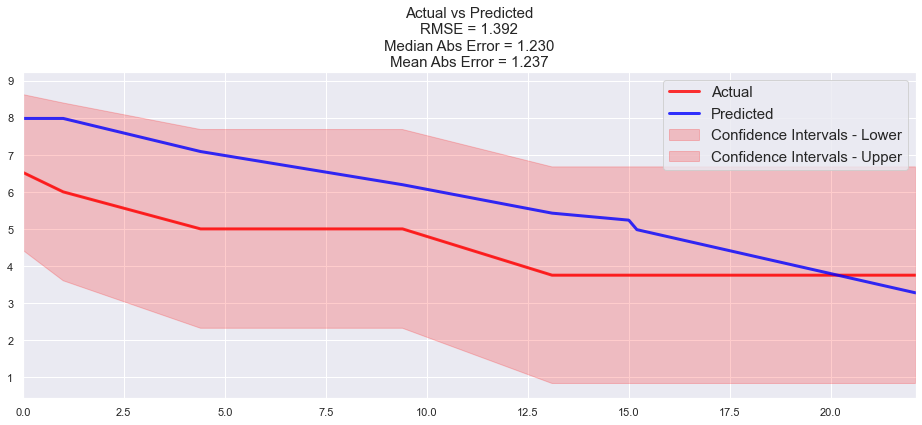

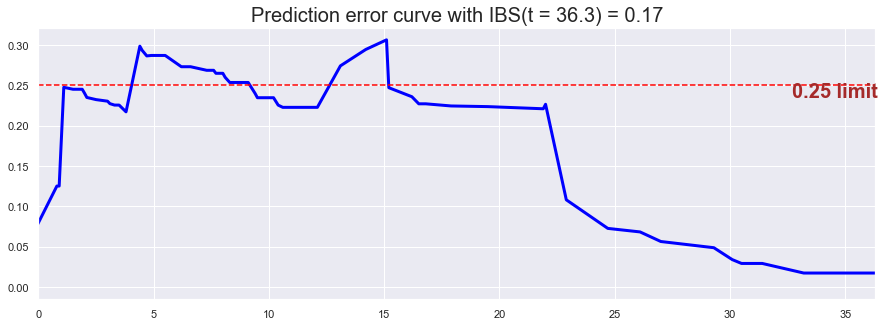

IBS: 0.17

 6 of kfold 10
C-index: 0.56


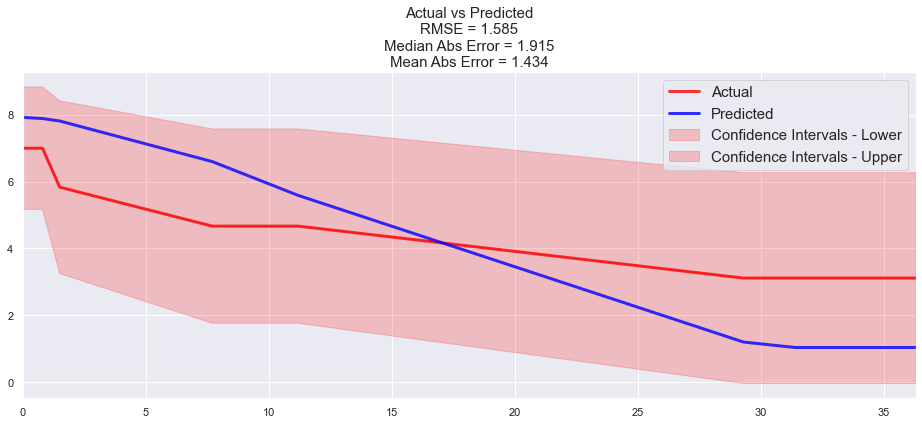

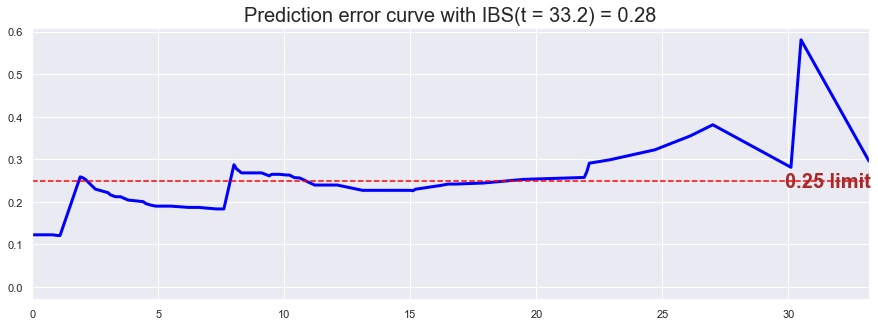

IBS: 0.28

 7 of kfold 10
C-index: 0.63


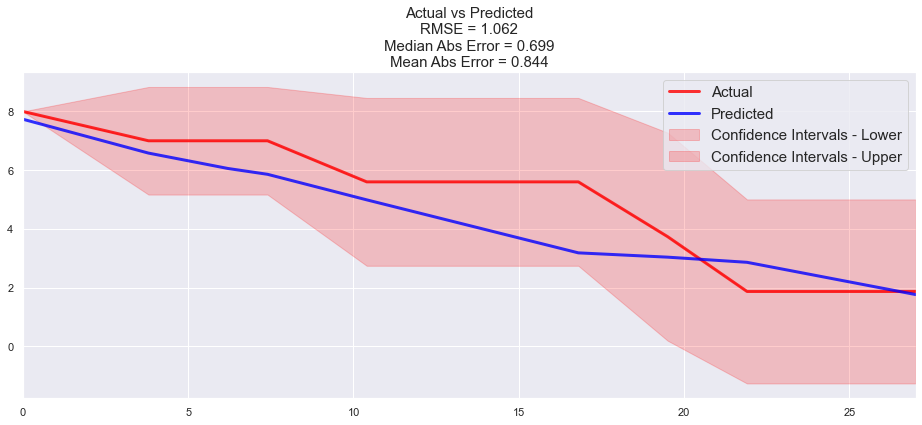

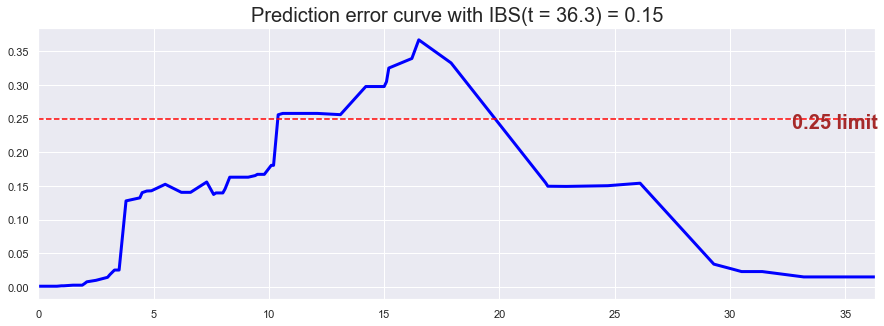

IBS: 0.15

 8 of kfold 10
C-index: 0.63


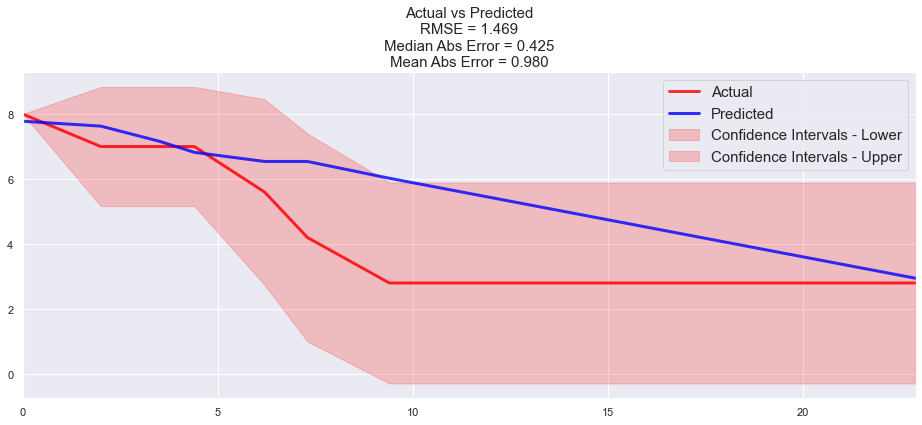

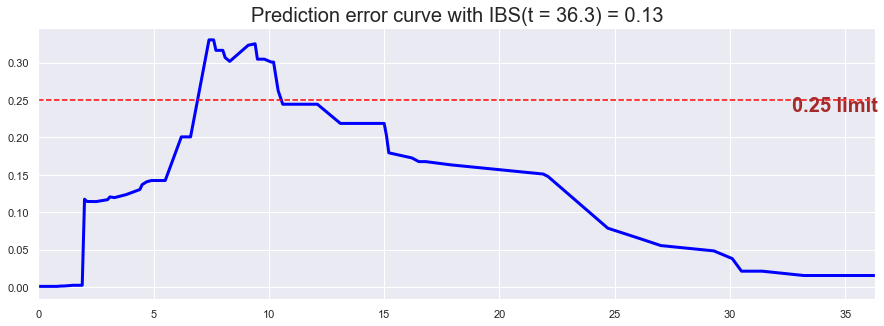

IBS: 0.13

 9 of kfold 10
C-index: 0.95


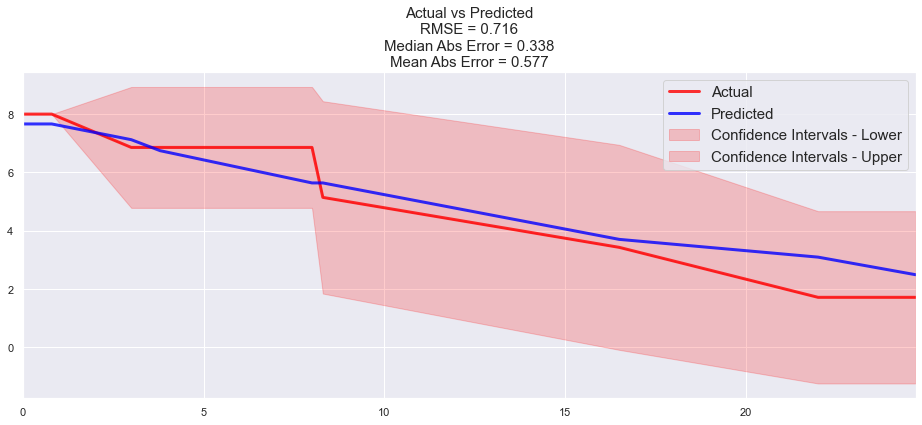

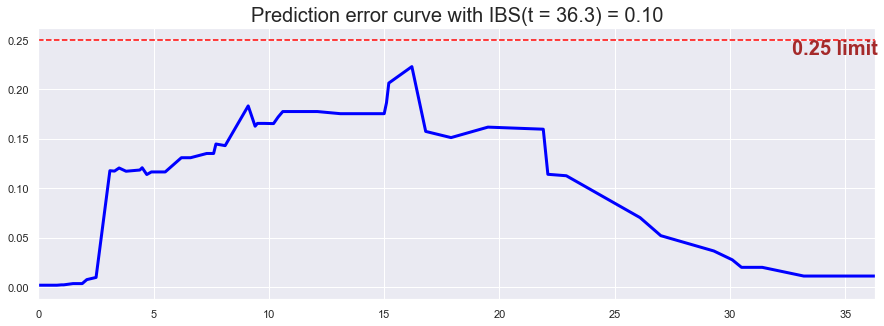

IBS: 0.10

 10 of kfold 10
C-index: 1.00


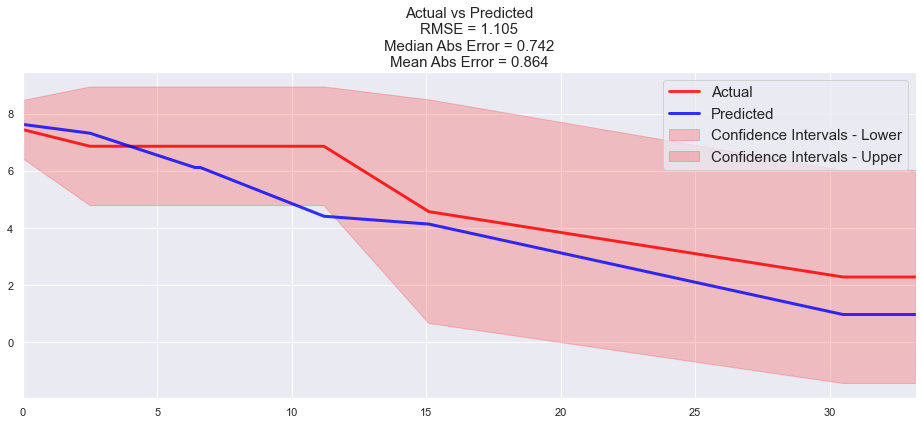

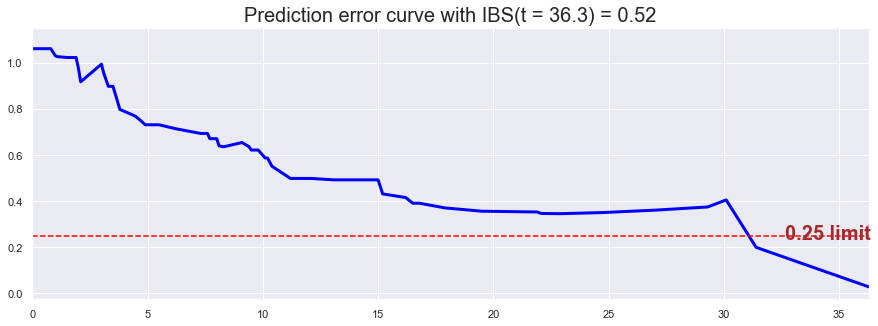

IBS: 0.52


In [45]:
#the random tree variables need to be fine tuned using loops because 
#the grid search CV is not compatible with the PySurvival package

from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import compare_to_actual
from pysurvival.utils.display import integrated_brier_score
i=1
kf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,E):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    X1_train, X1_test=X.loc[train_index], X.loc[test_index]
    X_train, X_test=X1_train[features], X1_test[features]
    T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
    E_train, E_test=E.loc[train_index].values, E.loc[test_index].values
    xst = RandomSurvivalForestModel(num_trees=10) 
    xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = 1,
        min_node_size = 2, num_threads = -1, 
        sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
    c_index = concordance_index(xst, X_test, T_test, E_test)
    print('C-index: {:.2f}'.format(c_index))
    results = compare_to_actual(xst, X_test, T_test, E_test, is_at_risk = True,  figure_size=(16, 6), 
                                metrics = ['rmse', 'mean', 'median'])
    ibs = integrated_brier_score(xst, X_test, T_test, E_test, t_max=100, figure_size=(15,5))
    print('IBS: {:.2f}'.format(ibs))
    i=i+1
   
    

### the importance table allows you to identify the main contributing features

In [46]:
xst.variable_importance_table.head(20)
#the results indicate that we only had 3 variables which were important features

,feature,importance,pct_importance
0,original_firstorder_TotalEnergy,1.063681,0.167928
1,original_glszm_LargeAreaEmphasis,1.054093,0.166414
2,original_glszm_HighGrayLevelZoneEmphasis,1.054093,0.166414
3,original_gldm_LowGrayLevelEmphasis,1.054093,0.166414
4,original_glcm_DifferenceAverage,1.054093,0.166414
5,original_firstorder_Kurtosis,1.054093,0.166414
6,diagnostics_Image-original_Mean,0.000000,0.000000
7,original_glcm_MaximumProbability,0.000000,0.000000
8,original_glszm_ZoneVariance,0.000000,0.000000
9,original_glszm_GrayLevelNonUniformityNormalized,0.000000,0.000000


## I am not sure what the cell below is doing...from the reference notebook, it seems to extract three certain features, but not sure why...(not the most important ones?)

In [20]:

data3=data2.loc[:, ['LBP94', 'LBP116',
       'FD51',, 'event column']]
data3

,LBP94,LBP116,FD51,time column,event column
0,0.008640,0.010616,0.079923,72.866667,0.0
1,0.007668,0.022017,0.128958,57.733333,0.0
2,0.021092,0.010747,0.056418,69.100000,0.0
3,0.016198,0.009453,0.141440,39.233333,0.0
4,0.009955,0.014629,0.157050,20.000000,1.0
...,...,...,...,...,...
130,0.022039,0.008869,0.087100,22.400000,0.0
131,0.012268,0.006853,0.055196,8.266667,1.0
132,0.015814,0.008804,0.100156,18.666667,0.0
133,0.019432,0.009172,0.112976,20.300000,0.0


In [27]:
# Creating the X, T and E inputs
Xnew = data3[['LBP94', 'LBP116','FD51', 'time column']]
features2=['LBP94', 'LBP116','FD51']

Xnew[features2]
Enew=data3['event column']
Enew
Xnew['time column']

0      72.866667
1      57.733333
2      69.100000
3      39.233333
4      20.000000
         ...    
130    22.400000
131     8.266667
132    18.666667
133    20.300000
134    19.966667
Name: time column, Length: 135, dtype: float64


 1 of kfold 10
C-index: 0.59


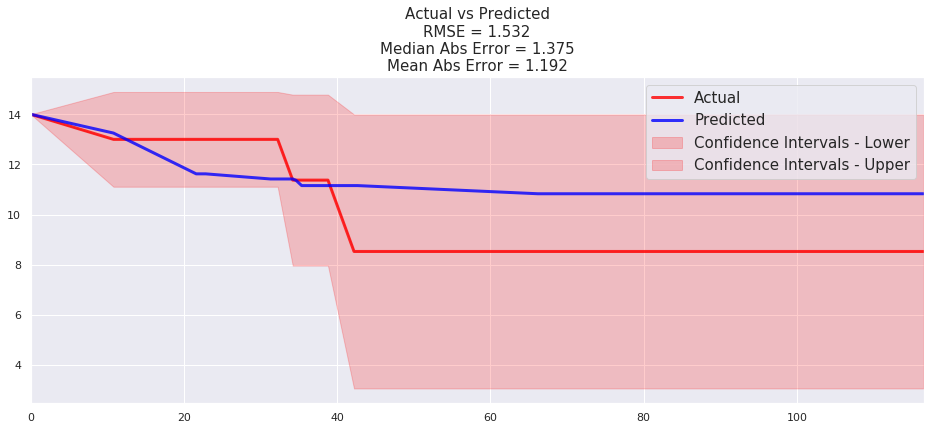

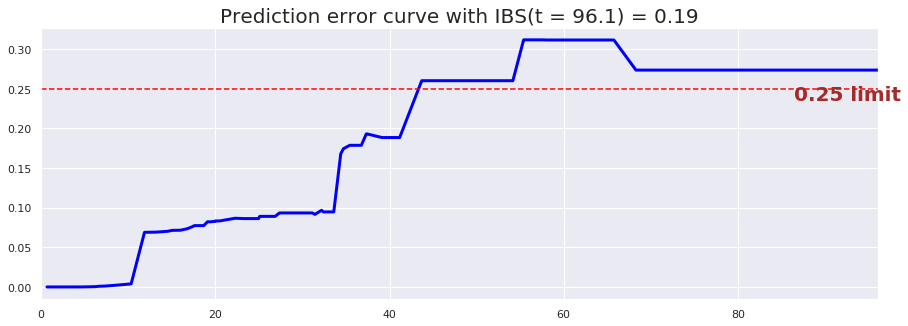

IBS: 0.19

 2 of kfold 10
C-index: 0.70


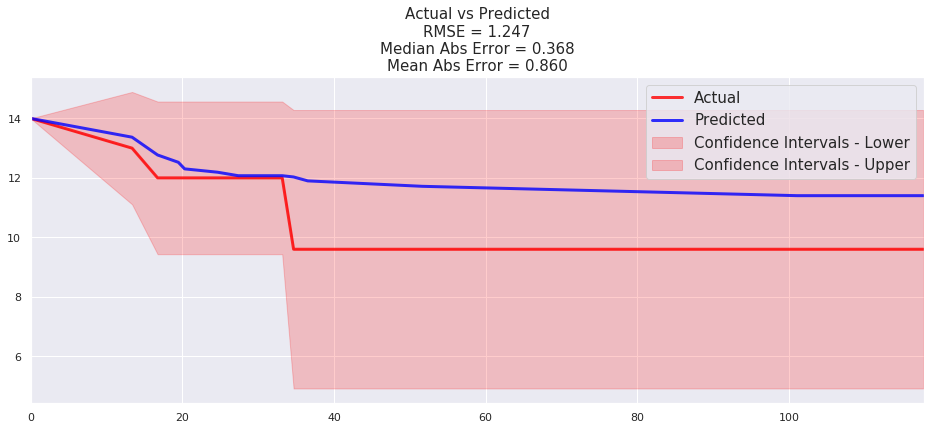

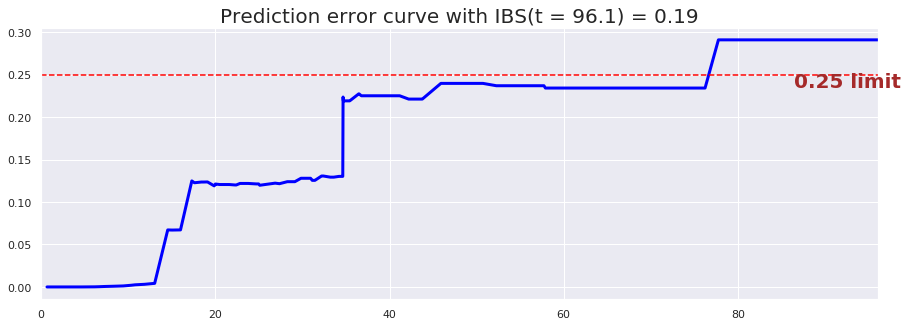

IBS: 0.19

 3 of kfold 10
C-index: 0.62


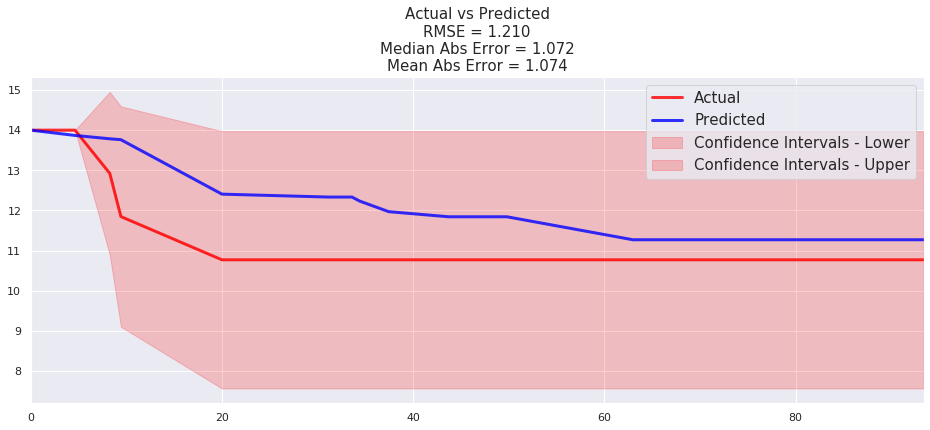

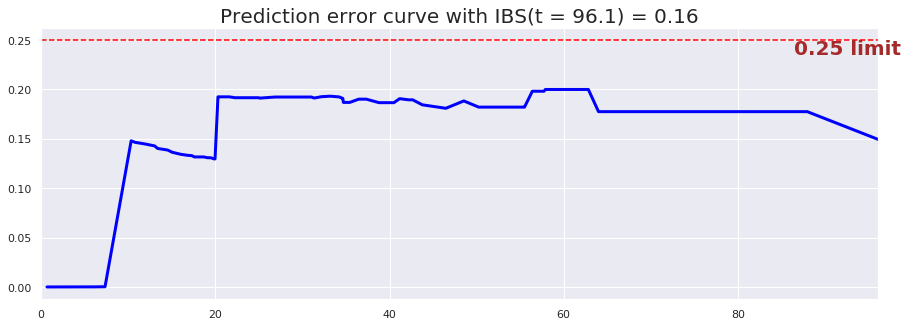

IBS: 0.16

 4 of kfold 10
C-index: 0.70


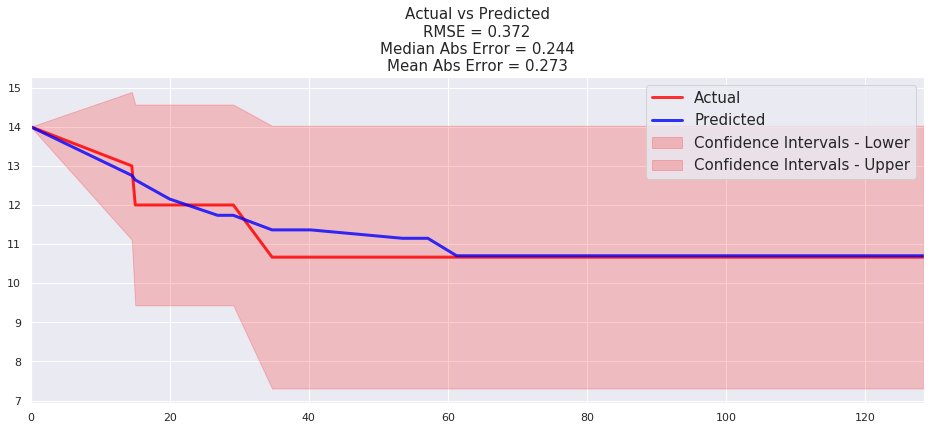

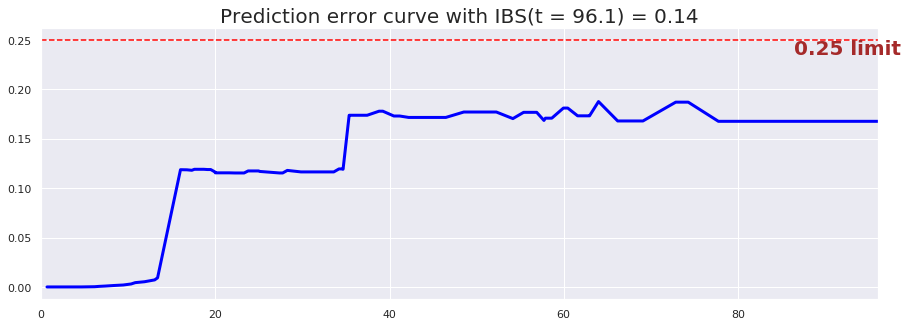

IBS: 0.14

 5 of kfold 10
C-index: 0.89


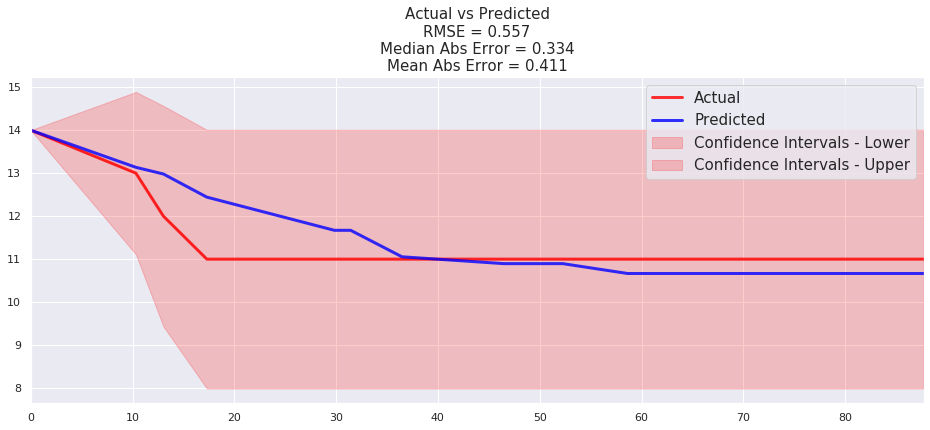

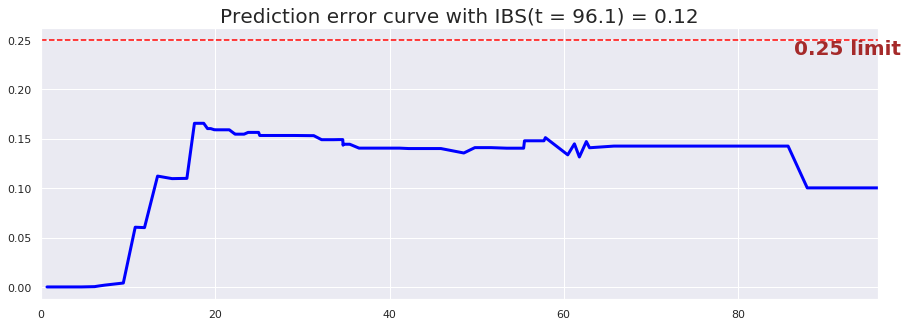

IBS: 0.12

 6 of kfold 10
C-index: 0.85


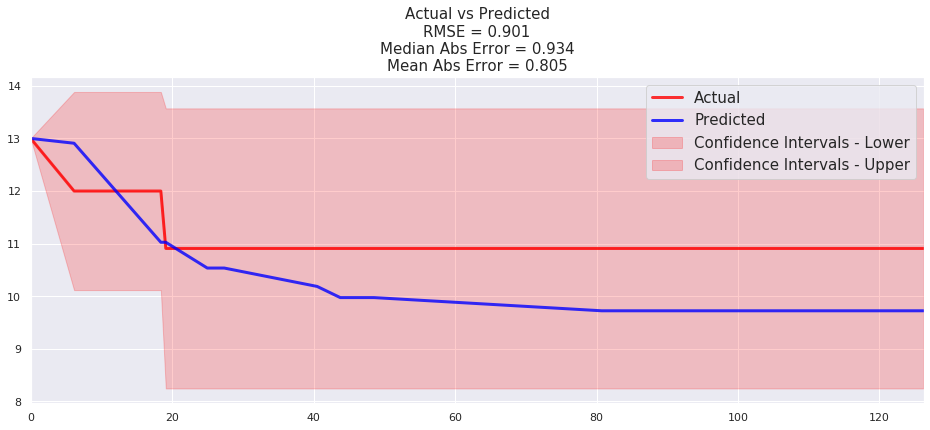

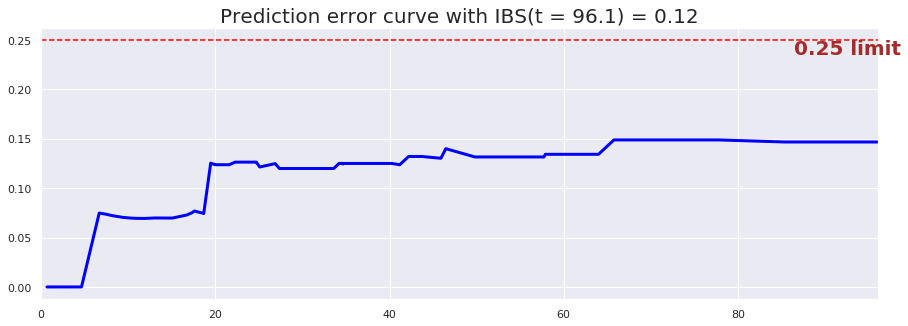

IBS: 0.12

 7 of kfold 10
C-index: 0.91


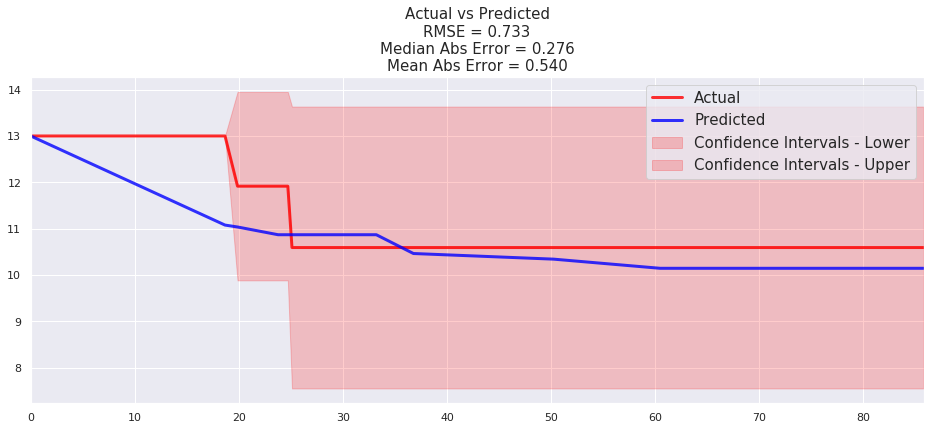

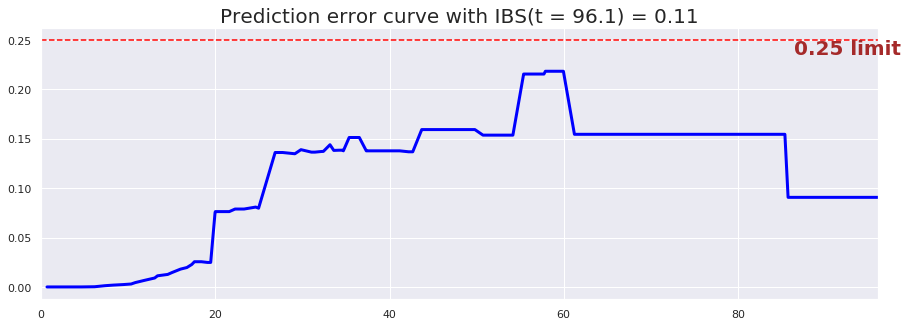

IBS: 0.11

 8 of kfold 10
C-index: 0.52


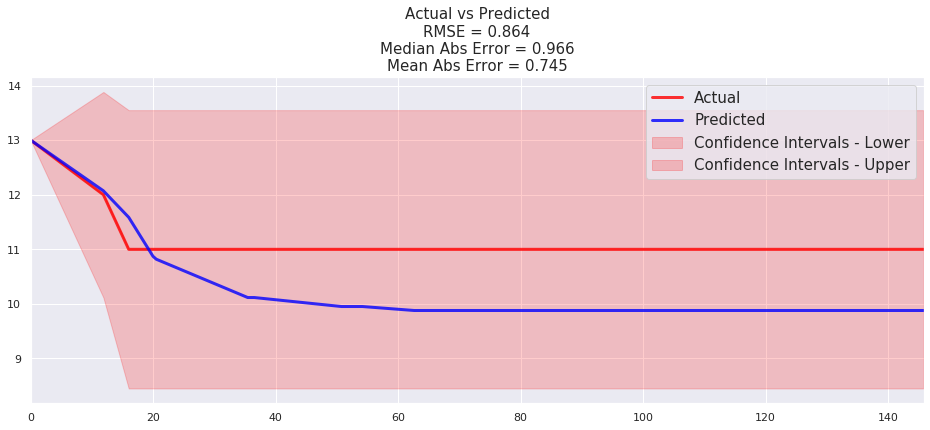

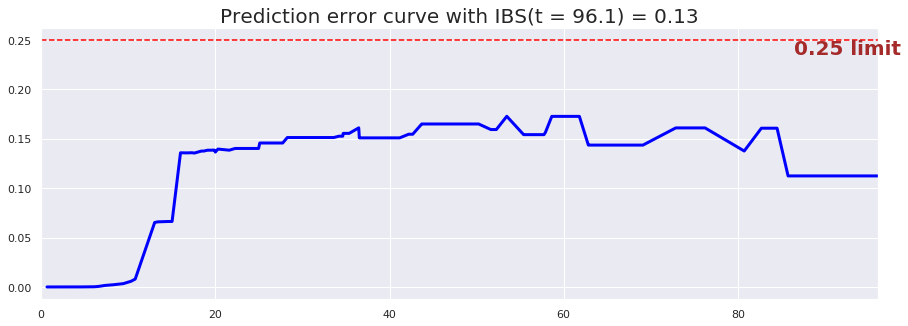

IBS: 0.13

 9 of kfold 10
C-index: 0.55


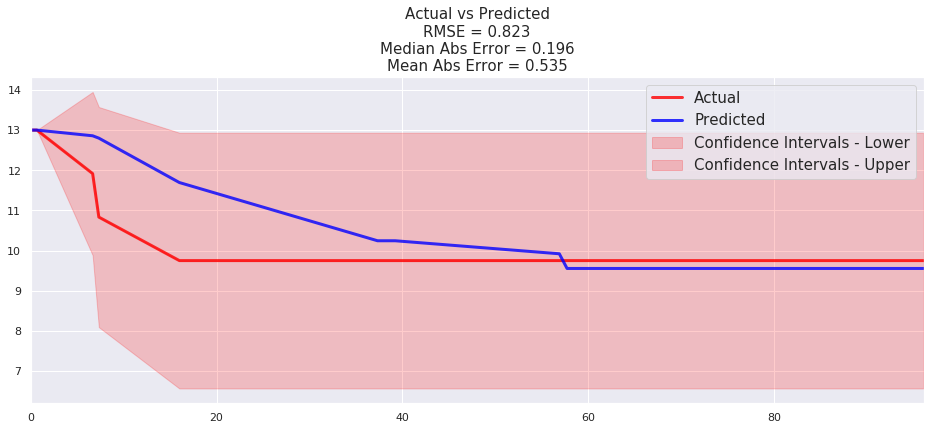

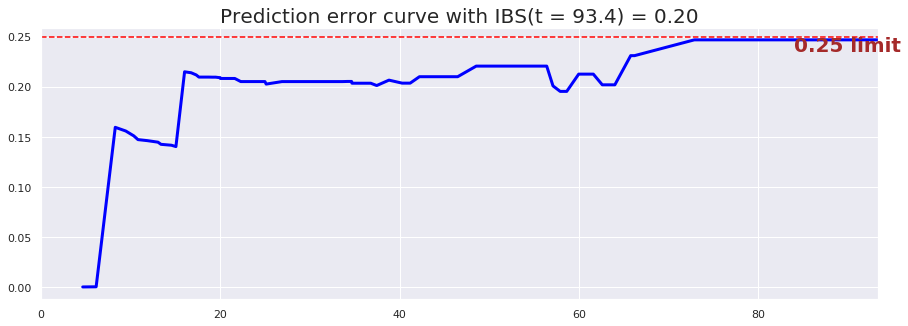

IBS: 0.20

 10 of kfold 10
C-index: 0.53


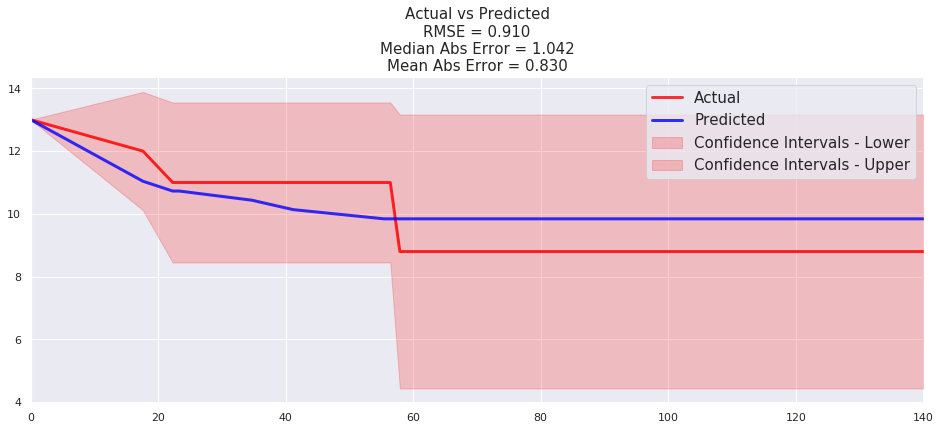

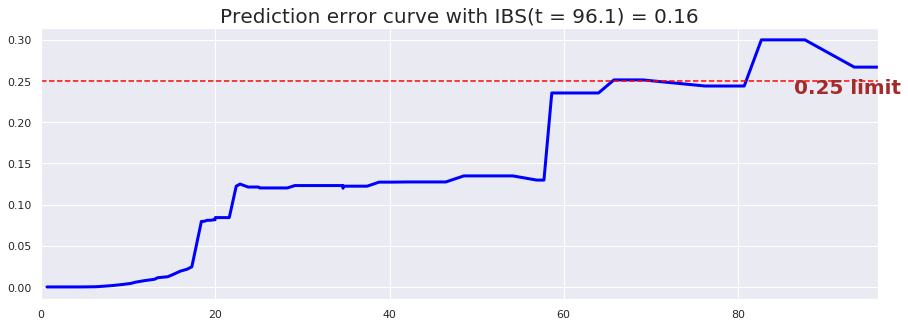

IBS: 0.16


In [28]:
#the random tree variables need to be fine tuned using loops because 
#the grid search CV is not compatible with the PySurvival package

from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import compare_to_actual
from pysurvival.utils.display import integrated_brier_score
i=1
kf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in kf.split(Xnew,Enew):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
    X_train, X_test=X1_train[features2], X1_test[features2]
    T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
    E_train, E_test=Enew.loc[train_index].values, Enew.loc[test_index].values
    xst = RandomSurvivalForestModel(num_trees=10) 
    xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = 1,
        min_node_size = 2, num_threads = -1, 
        sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
    c_index = concordance_index(xst, X_test, T_test, E_test)
    print('C-index: {:.2f}'.format(c_index))
    results = compare_to_actual(xst, X_test, T_test, E_test, is_at_risk = True,  figure_size=(16, 6), 
                                metrics = ['rmse', 'mean', 'median'])
    ibs = integrated_brier_score(xst, X_test, T_test, E_test, t_max=100, figure_size=(15,5))
    print('IBS: {:.2f}'.format(ibs))
    i=i+1

#### Below is an example on how to perform a grid search for the optimal RF parameters

In [47]:
num_tree=(10, 15, 20, 50, 100, 200)
max_depth=(1, 3, 5, 7, 9, 10, 20)
min_node=(2, 5, 10, 15, 20)


In [52]:
# this script searches the RF paramters listed in the cell 29
#prints out the average of 10 K Fold concordance
# originally, this used Xnew from the 3 extracted features
# but this was changed for this dataset
from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from statistics import mean 

# very poorly manually changing the variables to the original one until I figure out
# why 3 specific features were selected in the sampe notebook
# todo: update this later
Xnew = X
Enew = E
features2 = features

for a in num_tree:
    for b in max_depth:
        for c in min_node:
            cc=[]
            kf=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
            i=1
            for train_index, test_index in kf.split(Xnew,Enew):
                X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
                X_train, X_test=X1_train[features2], X1_test[features2]
                T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
                E_train, E_test=Enew.loc[train_index].values, Enew.loc[test_index].values
                xst = RandomSurvivalForestModel(num_trees=a) 
                xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = b,
                min_node_size = c, num_threads = -1, 
                sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
                seed = None, save_memory=False )
                from pysurvival.utils.metrics import concordance_index
                c_index = concordance_index(xst, X_test, T_test, E_test)
                cc.append(c_index)
                i=i+1
            print(a,b, c, mean(cc))
                 

10 1 2 0.6574695195649691
10 1 5 0.6733782649538567
10 1 10 0.6862955473296038
10 1 15 0.6994289320756077
10 1 20 0.6621457193794368
10 3 2 0.6501941311797047
10 3 5 0.6554330670744603
10 3 10 0.6888220602364271
10 3 15 0.6491980776395208
10 3 20 0.6404955612249488
10 5 2 0.65131989447473
10 5 5 0.7178817716757132
10 5 10 0.6546466028642832
10 5 15 0.6620707730810924
10 5 20 0.6126661494374218
10 7 2 0.6730383983806741
10 7 5 0.6768662401618273
10 7 10 0.6487393953226377
10 7 15 0.6656345129004934
10 7 20 0.7262217347754538
10 9 2 0.6507761647666538
10 9 5 0.7342338889274881
10 9 10 0.6413637844268224
10 9 15 0.6455089420869429
10 9 20 0.6840729438462513
10 10 2 0.6180771523368307
10 10 5 0.6888797836019687
10 10 10 0.6709722379670745
10 10 15 0.6636776910860539
10 10 20 0.6781018331411605
10 20 2 0.6924267469186212
10 20 5 0.6779327193959697
10 20 10 0.6667592960028997
10 20 15 0.7040506728081029
10 20 20 0.702525456721691
15 1 2 0.6896002317312115
15 1 5 0.6885437931510587
15 1 10 0.